In [1]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# data = pd.read_csv('master_data_clean.csv').drop(columns=['Agency_Type_grouped'])
data = pd.read_csv('clean_df_3_single_weapon.csv')

label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate features and target
target_column = 'Weapon Category'
X = data.drop(columns=[target_column])
y = data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Initialize and train the XGBoost classifier
xgb_model = XGBClassifier(eval_metric='aucpr', random_state=42, scale_pos_weight=scale_pos_weight)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(report)



Accuracy: 0.65

Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.69      0.72     30897
           1       0.47      0.56      0.51     15157

    accuracy                           0.65     46054
   macro avg       0.62      0.63      0.62     46054
weighted avg       0.67      0.65      0.65     46054



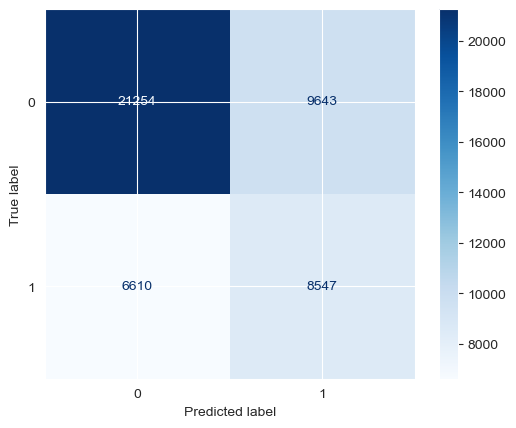

In [2]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues", values_format="d")
plt.show()


[0.45058644 0.54941356]


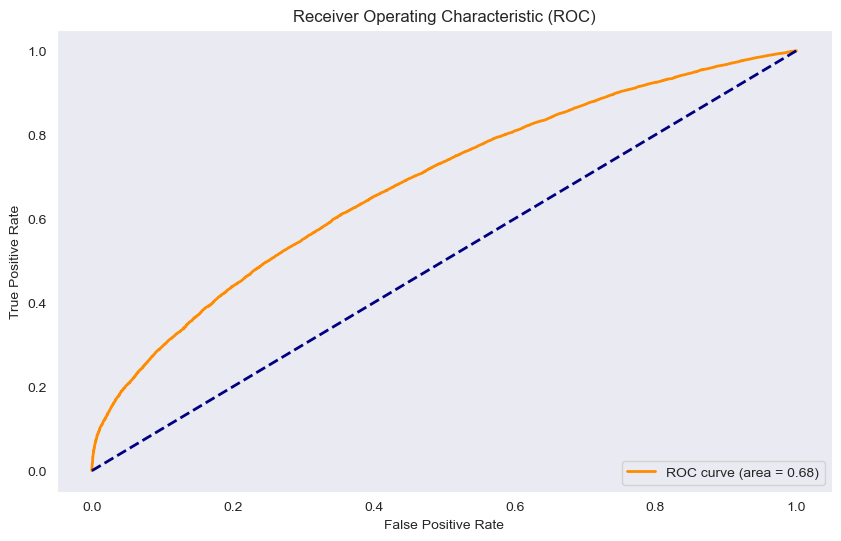

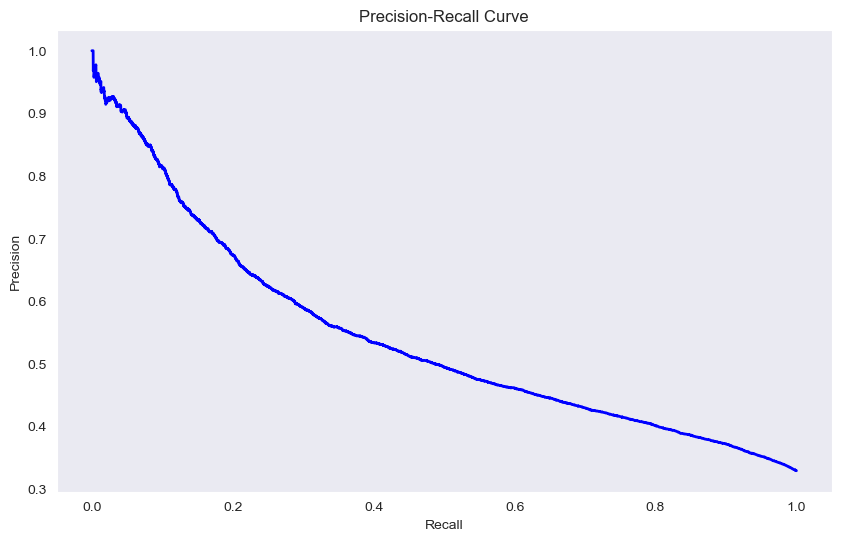

In [3]:
# Calculate probabilities for ROC and precision-recall curves
y_prob = xgb_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
prob = xgb_model.predict_proba(X_test)[0]  # Get probabilities for the positive class
print(prob)
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()


#With SMOTE

In [4]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(y_train_resampled.value_counts())


# Calculate scale_pos_weight
scale_pos_weight = len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1])

xgb_model = XGBClassifier(eval_metric='aucpr', random_state=42, scale_pos_weight=scale_pos_weight)
# Step 3: Train the XGBoost classifier
xgb_model.fit(X_train_resampled, y_train_resampled)

# Step 4: Evaluate on the test set
y_pred = xgb_model.predict(X_test)
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display the classification report
print(classification_report(y_test, y_pred))


Weapon Category
0    72091
1    72091
Name: count, dtype: int64
Accuracy: 0.6463933643114604
              precision    recall  f1-score   support

           0       0.76      0.69      0.72     30897
           1       0.47      0.56      0.51     15157

    accuracy                           0.65     46054
   macro avg       0.62      0.62      0.62     46054
weighted avg       0.67      0.65      0.65     46054



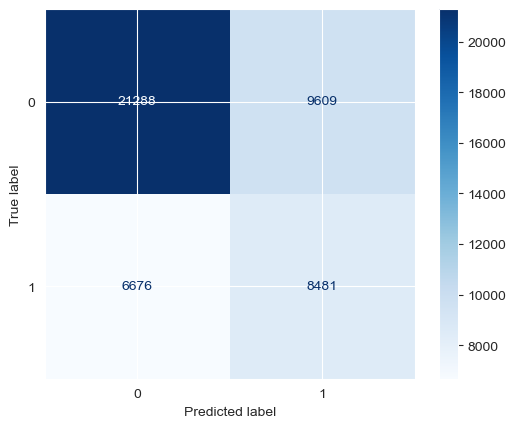

In [5]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues", values_format="d")
plt.show()

[0.4369322 0.5630678]


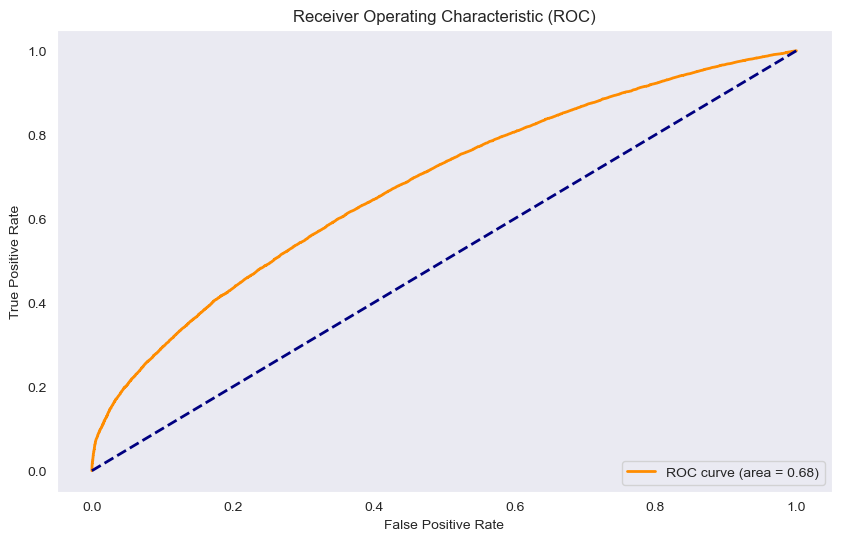

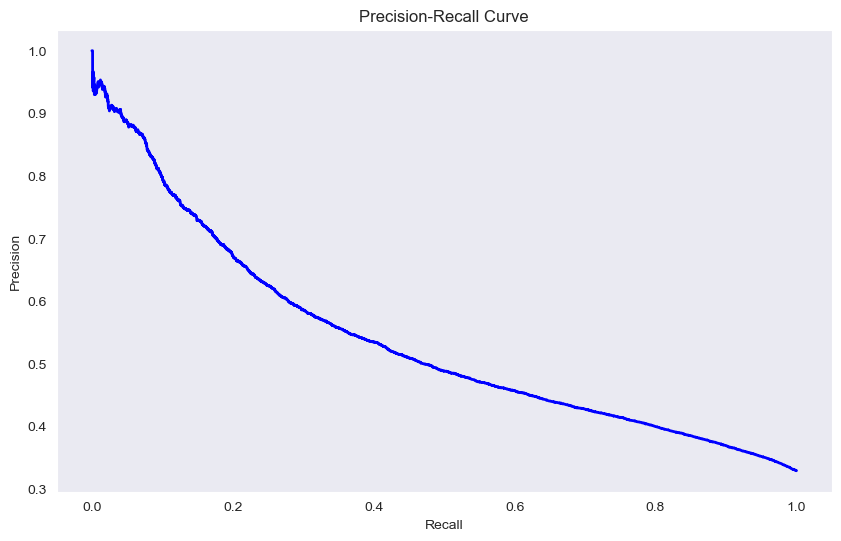

In [6]:
# Calculate probabilities for ROC and precision-recall curves
y_prob = xgb_model.predict_proba(X_test)[:, 1]
prob = xgb_model.predict_proba(X_test)[0]
print(prob)
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

In [7]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

xgb_model = XGBClassifier(eval_metric='aucpr', random_state=42)
# Step 3: Train the XGBoost classifier
xgb_model.fit(X_train_resampled, y_train_resampled)

# Step 4: Evaluate on the test set
y_pred = xgb_model.predict(X_test)
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.76      0.69      0.73     30897
           1       0.47      0.56      0.51     15157

    accuracy                           0.65     46054
   macro avg       0.62      0.63      0.62     46054
weighted avg       0.67      0.65      0.66     46054



Using RandomizedSearchCV to get the best hyperparameters. Also using one hot encoding

Preparing data...
Running RandomizedSearchCV...
Fitting 3 folds for each of 50 candidates, totalling 150 fits

Best Parameters Found: {'colsample_bytree': 0.923330571119153, 'learning_rate': 0.26689728756342773, 'max_depth': 8, 'n_estimators': 169, 'scale_pos_weight': 0.9877700987609598, 'subsample': 0.9254642243837563}

Evaluating Best Model...
Classification Report:
               precision    recall  f1-score   support

 Non-Firearm       0.51      0.40      0.44     15157
     Firearm       0.73      0.81      0.77     30897

    accuracy                           0.67     46054
   macro avg       0.62      0.60      0.61     46054
weighted avg       0.66      0.67      0.66     46054



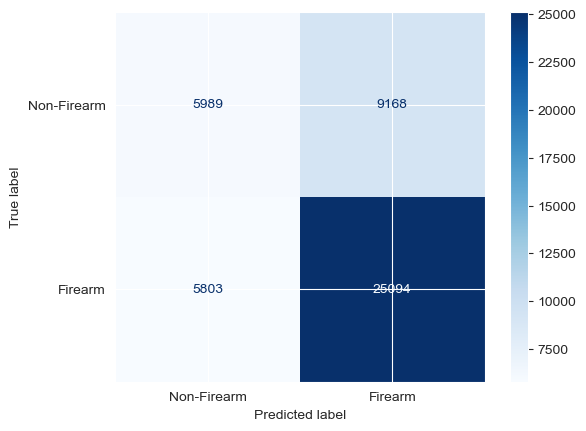

In [46]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from scipy.stats import uniform, randint

# Load dataset
df_encoded = pd.read_csv('clean_df_3_single_weapon.csv')

# Define categorical columns
categorical_columns = [
    'Agency Type', 'Victim Sex', 'Victim Age', 'Victim Ethnicity',
    'Perpetrator Sex', 'Perpetrator Ethnicity',
    'Relationship Category', 'Region', 'Season'
]

# Encode target variable
df_encoded['Weapon Category'] = df_encoded['Weapon Category'].map({'Non-Firearm': 0, 'Firearm': 1})
labels = ['Non-Firearm', 'Firearm']

# Prepare data for one-hot encoding
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_onehot_encoded = onehot_encoder.fit_transform(df_encoded[categorical_columns])
X_onehot_encoded = np.hstack((
    X_onehot_encoded,
    df_encoded.drop(columns=categorical_columns + ['Weapon Category']).values
))
y = df_encoded['Weapon Category']

# Define scaling and train-test splits with SMOTE
def prepare_data(X, y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42, stratify=y
    )
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    return X_train, X_test, y_train, y_test

# Define hyperparameter search space
param_distributions = {
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'scale_pos_weight': uniform(0.1, 1.0),
    'n_estimators': randint(50, 200),
    'colsample_bytree': uniform(0.5, 0.5),
    'subsample': uniform(0.5, 0.5)
}

# Train and tune XGBoost using RandomizedSearchCV
def train_xgboost_with_random_search(X_train, y_train):
    model = XGBClassifier(eval_metric='aucpr', random_state=42)
    randomized_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_distributions,
        scoring='f1_weighted',  # Optimize for a balance of precision and recall
        n_iter=50,
        cv=3,
        random_state=42,
        verbose=1,
        n_jobs=-1
    )
    randomized_search.fit(X_train, y_train)
    return randomized_search

# Display and evaluate results
def evaluate_model(model, X_test, y_test, labels):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=labels, zero_division=0))
    ConfusionMatrixDisplay(cm, display_labels=labels).plot(cmap='Blues')
    return cm

# Main execution flow
print("Preparing data...")
X_train, X_test, y_train, y_test = prepare_data(X_onehot_encoded, y)

print("Running RandomizedSearchCV...")
best_model = train_xgboost_with_random_search(X_train, y_train)

print("\nBest Parameters Found:", best_model.best_params_)

print("\nEvaluating Best Model...")
conf_matrix = evaluate_model(best_model.best_estimator_, X_test, y_test, labels)
